<a href="https://colab.research.google.com/github/shimaa83/data_analysis_thanwayaAma/blob/main/web_scrape_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install selenium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 14.4 MB/s 
     |████████████████████████████████| 140 kB 64.7 MB/s 
     |████████████████████████████████| 384 kB 59.1 MB/s 
     |████████████████████████████████| 58 kB 4.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [3]:
# BeautifulSoup It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure
!pip install BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement BeautifulSoup (from versions: 3.2.0, 3.2.1, 3.2.2)
ERROR: No matching distribution found for BeautifulSoup


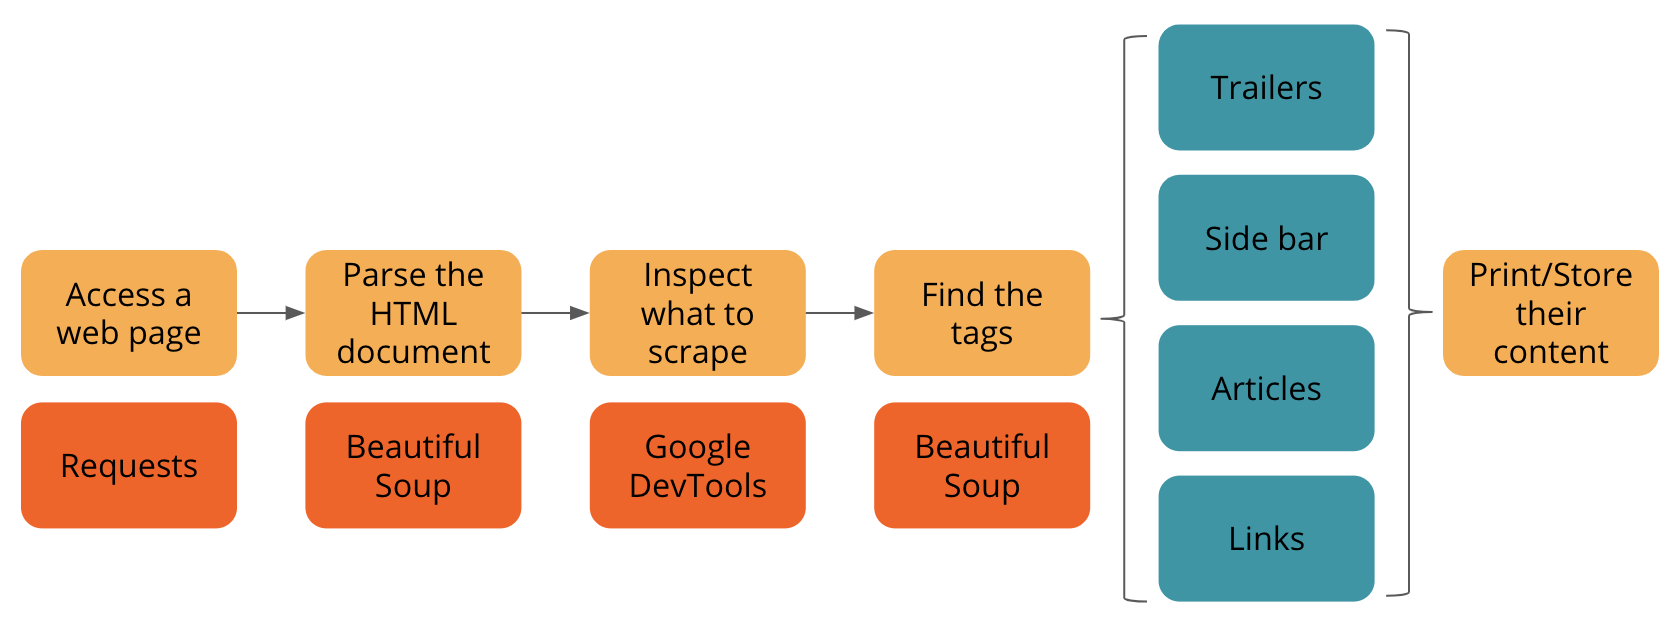

In [11]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [15]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com'

# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Title of the parsed page
imdb_soup.title

<title>IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows</title>

In [16]:
imdb_soup.title.string

'IMDb: Ratings, Reviews, and Where to Watch the Best Movies & TV Shows'

In [17]:
trailers = imdb_soup.find('div', {'class': 'ab_hero'})

In [22]:
for widget in imdb_soup.find_all('div', {'class': 'aux-content-widget-2'}):
    # Check that the widget has a heading
    if widget.h3:
        # Print the widget's heading along with the movie titles.
        print(widget.h3.string)
        for title in widget.find_all('div', {'class': 'title'}):
            print(title.text)
        print()

In [23]:
for article in imdb_soup.find_all('div', {'class': 'article'}):
    if article.h3:
        # Title of the article
        print(article.h3.string)
        # Text
        print(article.p.text)
        print()

In [24]:
# Find all links
links = [link.get('href') for link in imdb_soup.find_all('a')]
print(links)

['/?ref_=nv_home', 'https://www.imdb.com/calendar/?ref_=nv_mv_cal', '/chart/top/?ref_=nv_mv_250', '/chart/moviemeter/?ref_=nv_mv_mpm', '/feature/genre/?ref_=nv_ch_gr', '/chart/boxoffice/?ref_=nv_ch_cht', '/showtimes/?ref_=nv_mv_sh', '/news/movie/?ref_=nv_nw_mv', '/india/toprated/?ref_=nv_mv_in', '/whats-on-tv/?ref_=nv_tv_ontv', '/chart/toptv/?ref_=nv_tvv_250', '/chart/tvmeter/?ref_=nv_tvv_mptv', '/feature/genre/', '/news/tv/?ref_=nv_nw_tv', '/india/tv?ref_=nv_tv_in', '/what-to-watch/?ref_=nv_watch', '/trailers/?ref_=nv_mv_tr', '/originals/?ref_=nv_sf_ori', '/imdbpicks/?ref_=nv_pi', '/podcasts/?ref_=nv_pod', '/oscars/?ref_=nv_ev_acd', 'https://m.imdb.com/feature/bestpicture/?ref_=nv_ch_osc', 'https://www.imdb.com/search/title/?count=100&groups=oscar_best_picture_winners&sort=year%2Cdesc&ref_=nv_ch_osc', '/emmys/?ref_=nv_ev_rte', '/starmeterawards/?ref_=nv_ev_sma', '/comic-con/?ref_=nv_ev_comic', '/nycc/?ref_=nv_ev_nycc', '/sundance/?ref_=nv_ev_sun', '/toronto/?ref_=nv_ev_tor', '/awards-